**RFM MODEL IMPLEMENTATION FOR GLOBAL SUPERSTORE CUSTOMER SEGMENTATION**

**Team ID: : A25-CS264**

**Project Team Members:**
1. Rizal Afandi (M004D5Y1738) - Machine Learning - Institut Teknologi Sepuluh Nopember
2. Muhammad Aflah Ghozi Susanto (M004D5Y1199) - Machine Learning - Institut Teknologi Sepuluh Nopember
3. Ahmad Haydar Alfarizqi (M004D5Y0095) - Machine Learning - Institut Teknologi Sepuluh Nopember        

# **1. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import kagglehub
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.patches import Patch
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# **2. Load Dataset**
   

In [ ]:
# Load data
path = kagglehub.dataset_download("rohitsahoo/sales-forecasting")
print("Files:", os.listdir(path))
csv_file = [f for f in os.listdir(path) if f.endswith(".csv")][0]

Using Colab cache for faster access to the 'sales-forecasting' dataset.
Files: ['train.csv']


In [ ]:
# Load data
df = pd.read_csv(os.path.join(path, csv_file))
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# **3. Pembersihan dan Pra Pemrosesan Data**

## Missing dan Duplikat Data

In [ ]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(0)

## Feature Engineering

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [ ]:
df.sort_values('Order Date', ascending=True, inplace=True)

In [ ]:
# Simpan Data
df.to_csv('data_clean.csv', index=False)

## EDA

/tmp/ipython-input-234168311.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = order_date_df['Sales'].resample('Q').sum()


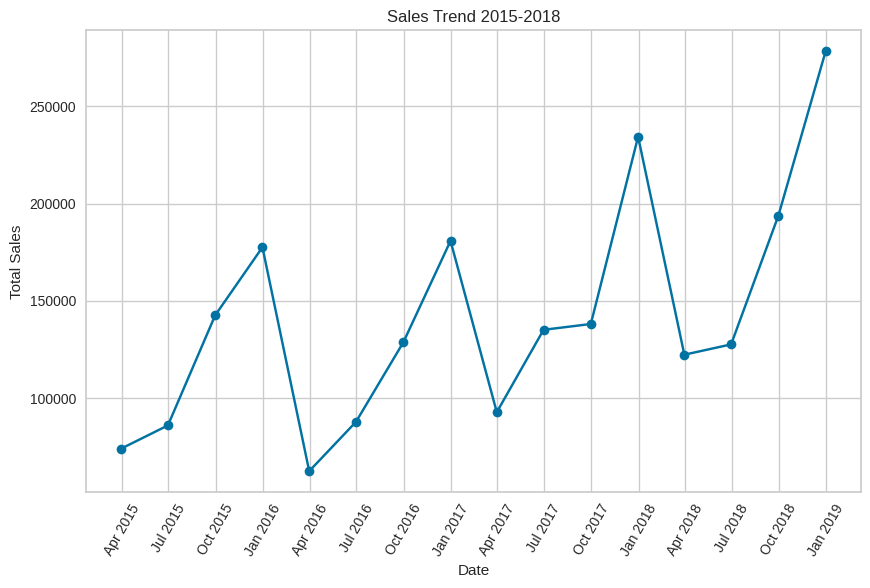

In [ ]:
from matplotlib.dates import MonthLocator, DateFormatter

order_date_df = df.set_index('Order Date')

# Quarterly sales
quarterly_sales = order_date_df['Sales'].resample('Q').sum()
quarterly_sales = quarterly_sales.round(2)

plt.figure(figsize=(10, 6))
plt.plot(quarterly_sales.index, quarterly_sales.values, marker='o', linestyle='-')

# Customize x-axis ticks for quarterly intervals
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(bymonth=[1, 4, 7, 10]))
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))

plt.title('Sales Trend 2015-2018')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

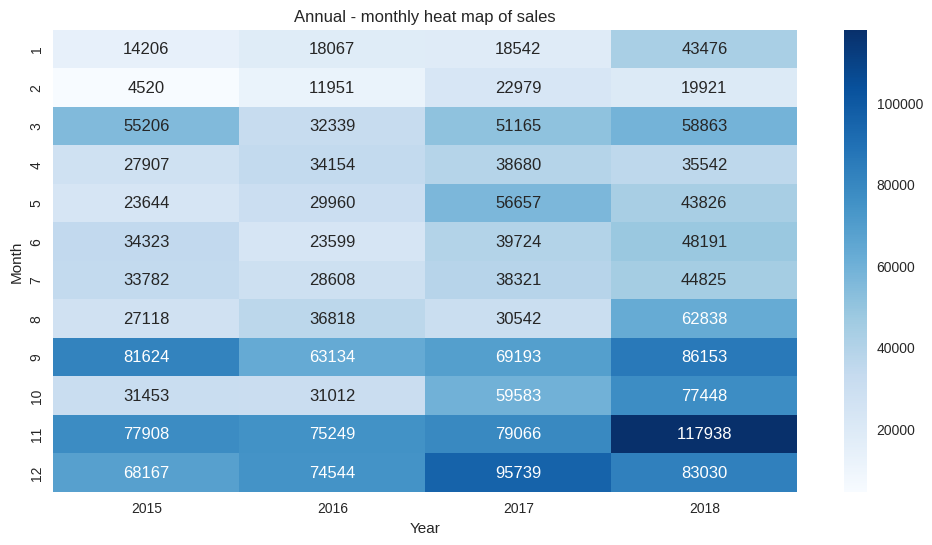

In [ ]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

heatmap_data = df.reset_index().pivot_table(
    index='Month',
    columns='Year',
    values='Sales',
    aggfunc='sum'
)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".0f")
plt.title('Annual - monthly heat map of sales')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

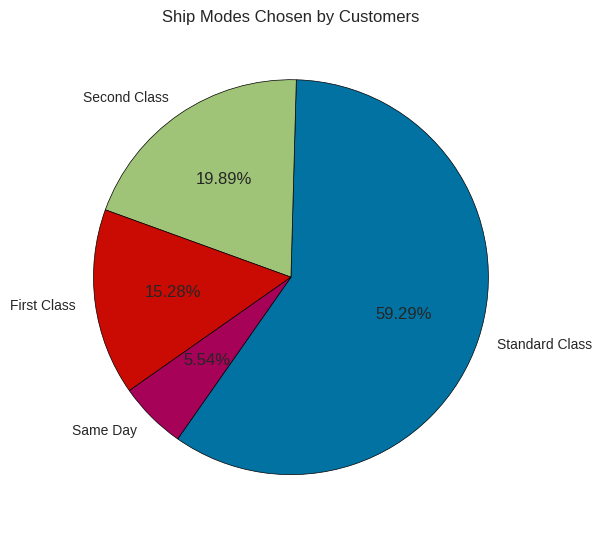

In [ ]:
# Create a new df of total sales of ship mode and count of ship modes columns
ship_mode_df = df.groupby('Ship Mode').sum(numeric_only=True).sort_values('Sales', ascending=False)
ship_mode_df = ship_mode_df[['Sales']]
ship_mode_df['Count'] = df['Ship Mode'].value_counts()
ship_mode_df.reset_index(inplace=True)

plt.pie(ship_mode_df['Sales'], labels=ship_mode_df['Ship Mode'], autopct='%1.2f%%',
        startangle=235, wedgeprops={'edgecolor':'black','linewidth':0.5})
plt.title('Ship Modes Chosen by Customers')
plt.tight_layout()
plt.show()

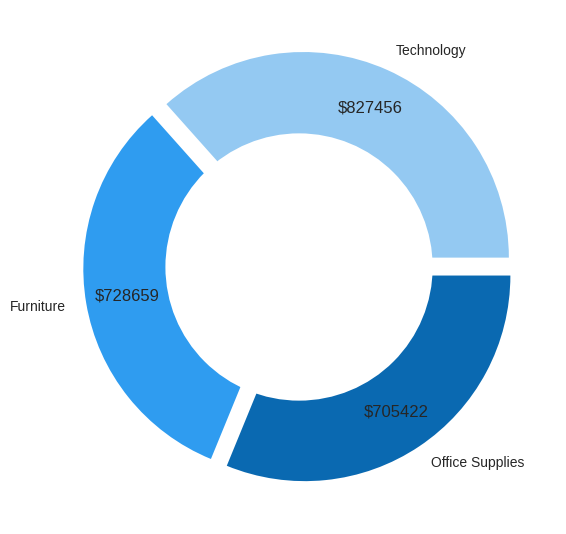

In [ ]:
category_df = df.groupby('Category').sum(numeric_only=True).sort_values('Sales', ascending=False)[['Sales']]
category_df['Sales'] = category_df['Sales'].round(2)
category_df.reset_index(inplace=True)

colors = ['#94C9F2','#2F9CF0','#0A69B1']
explode = [0.05, 0.05, 0.05]

# display actual values instead of percentages
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '${v:d}'.format(v=val)
    return my_format

plt.pie(category_df['Sales'], labels=category_df['Category'],colors=colors,
       explode=explode, autopct=autopct_format(category_df['Sales']),
       pctdistance=0.80)

circle = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(circle)
plt.tight_layout()
plt.show()

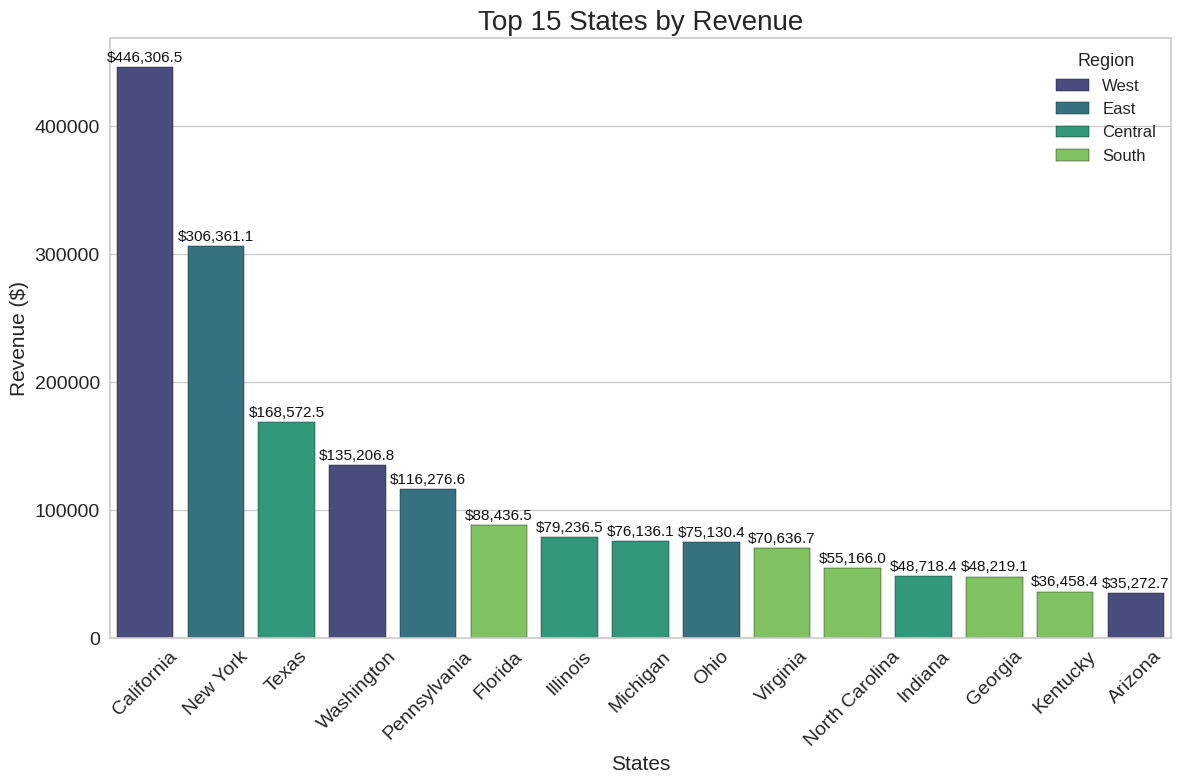

In [ ]:
# 1. PERUBAHAN DISINI: Group by 'State' DAN 'Region' agar kolom Region tidak hilang
top_states = df.groupby(['State', 'Region'])['Sales'].sum().reset_index()

# Formatting dan Sorting
top_states['Sales'] = top_states['Sales'].round(1)
top_states.sort_values(['Sales'], ascending=False, inplace=True)
top_states = top_states.head(15)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_states, x='State', y='Sales', hue='Region',
                 palette='viridis', dodge=False, edgecolor='k')

# Show values at top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(x = p.get_x() + p.get_width()/2, # Posisi X (tengah bar)
                y = height + 4000,               # Posisi Y (sedikit di atas bar)
                s = f'${height:,.1f}',           # Format angka dengan koma
                ha = 'center',                   # Horizontal alignment
                fontsize = 11,
                color = 'k')

plt.title('Top 15 States by Revenue', fontsize=20)
plt.xlabel('States', fontsize=15)
plt.ylabel('Revenue ($)', fontsize=15)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Mengatur posisi Legend agar tidak menutupi grafik
plt.legend(title='Region', fontsize=12, title_fontsize=13, loc='upper right')

plt.tight_layout()
plt.show()

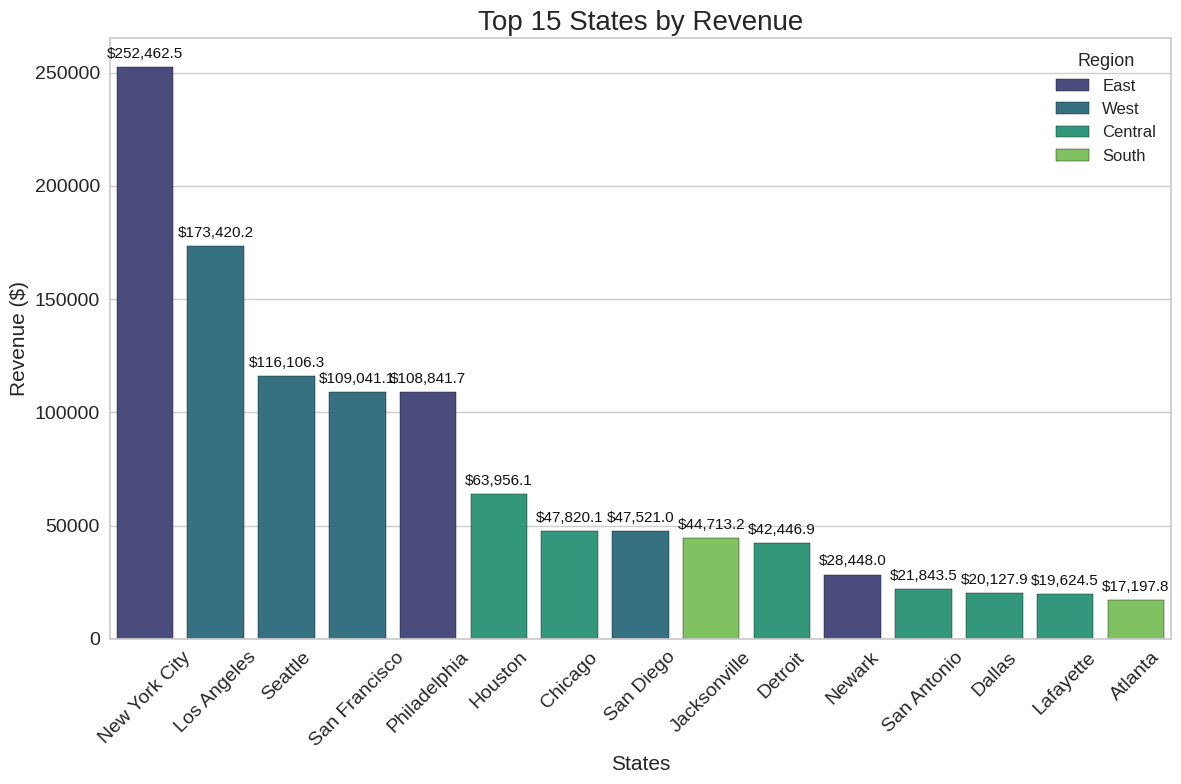

In [ ]:
# 1. PERUBAHAN DISINI: Group by 'State' DAN 'Region' agar kolom Region tidak hilang
top_states = df.groupby(['City', 'Region'])['Sales'].sum().reset_index()

# Formatting dan Sorting
top_states['Sales'] = top_states['Sales'].round(1)
top_states.sort_values(['Sales'], ascending=False, inplace=True)
top_states = top_states.head(15)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_states, x='City', y='Sales', hue='Region',
                 palette='viridis', dodge=False, edgecolor='k')

# Show values at top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(x = p.get_x() + p.get_width()/2, # Posisi X (tengah bar)
                y = height + 4000,               # Posisi Y (sedikit di atas bar)
                s = f'${height:,.1f}',           # Format angka dengan koma
                ha = 'center',                   # Horizontal alignment
                fontsize = 11,
                color = 'k')

plt.title('Top 15 States by Revenue', fontsize=20)
plt.xlabel('States', fontsize=15)
plt.ylabel('Revenue ($)', fontsize=15)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Mengatur posisi Legend agar tidak menutupi grafik
plt.legend(title='Region', fontsize=12, title_fontsize=13, loc='upper right')

plt.tight_layout()
plt.show()

## Data Aggregation

In [ ]:
# Fungsi get_mode tetap digunakan untuk Region (jika masih ingin dipertahankan)
def get_mode(x):
    return x.mode()[0] if not x.mode().empty else x.iloc[0]

recent_date = df['Order Date'].max()
main_agg = df.groupby('Customer ID').agg({
    'Customer Name': 'first',                      # Mengambil nama customer
    'Order Date': lambda x: (recent_date - x.max()).days,  # Recency
    'Order ID': 'nunique',                         # Frequency
    'Sales': ['sum', 'mean'],                      # Monetary & Avg Price
    'Product ID': 'nunique',                       # Unique Product Count
    'Product Name': get_mode,
    'City': get_mode,
    'State': get_mode,
    'Region': get_mode
})

# Merapikan nama kolom
main_agg.columns = [
    'Customer Name',
    'Recency',
    'Frequency',
    'Monetary',
    'Avg_Item_Price',
    'Unique_Product_Count',
    'Fav_Product',
    'City',
    'State',
    'Region'
]

# Membuat Perhitungan Jumlah (Counts) untuk Variabel Kategorikal
# Category Counts
category_counts = pd.crosstab(df['Customer ID'], df['Category'])
category_counts = category_counts.add_suffix('_Count')

# Ship Mode Counts (Pengganti Modus Ship Mode)
ship_mode_counts = pd.crosstab(df['Customer ID'], df['Ship Mode'])
ship_mode_counts = ship_mode_counts.add_suffix('_Count')

# Segment Counts (Pengganti Modus Segment)
segment_counts = pd.crosstab(df['Customer ID'], df['Segment'])
segment_counts = segment_counts.add_suffix('_Count')

# Menggabungkan Semuanya (Join)
final_df = main_agg.join([category_counts, ship_mode_counts, segment_counts])
final_df = final_df.reset_index()

# Menampilkan hasil
final_df

,Customer ID,Customer Name,Recency,Frequency,Monetary,Avg_Item_Price,Unique_Product_Count,Fav_Product,City,State,...,Furniture_Count,Office Supplies_Count,Technology_Count,First Class_Count,Same Day_Count,Second Class_Count,Standard Class_Count,Consumer_Count,Corporate_Count,Home Office_Count
0,AA-10315,Alex Avila,184,5,5563.560,505.778182,11,"Acco Banker's Clasps, 5 3/4""-Long",Round Rock,Texas,...,1,8,2,1,0,0,10,11,0,0
1,AA-10375,Allen Armold,19,9,1056.390,70.426000,15,"ACCOHIDE 3-Ring Binder, Blue, 1""",Atlanta,Georgia,...,1,11,3,4,0,3,8,15,0,0
2,AA-10480,Andrew Allen,259,4,1790.512,149.209333,12,"Carina 42""Hx23 3/4""W Media Storage Unit",Detroit,Michigan,...,2,8,2,0,1,0,11,12,0,0
3,AA-10645,Anna Andreadi,55,6,5086.935,282.607500,18,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",Georgetown,California,...,8,8,2,7,0,0,11,18,0,0
4,AB-10015,Aaron Bergman,415,3,886.156,147.692667,6,Akro Stacking Bins,Seattle,Washington,...,2,3,1,5,0,0,1,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,Xylona Preis,43,11,2374.658,84.809214,28,"Acco Pressboard Covers with Storage Hooks, 9 1...",Los Angeles,California,...,4,21,3,2,0,3,23,28,0,0
789,YC-21895,Yoseph Carroll,4,5,5454.350,681.793750,8,AT&T CL83451 4-Handset Telephone,Newark,Delaware,...,1,5,2,2,1,0,5,0,8,0
790,YS-21880,Yana Sorensen,9,8,6720.444,560.037000,11,Letter Size Cart,Seattle,California,...,3,8,1,1,0,0,11,0,12,0
791,ZC-21910,Zuschuss Carroll,54,13,8025.707,258.893774,31,"#10 White Business Envelopes,4 1/8 x 9 1/2",Houston,Texas,...,8,17,6,4,0,1,26,31,0,0


In [ ]:
rfm_df = final_df[['Recency', 'Frequency', 'Monetary']].copy()

## Scaling Data

In [ ]:
numeric_cols = rfm_df.select_dtypes(include=np.number).columns.tolist()
scaler = MinMaxScaler()
rfm_df[numeric_cols] = scaler.fit_transform(rfm_df[numeric_cols])

In [ ]:
joblib.dump(scaler, 'scaler_clustering.pkl')

['scaler_clustering.pkl']

# **4. Membangun Model Clustering**

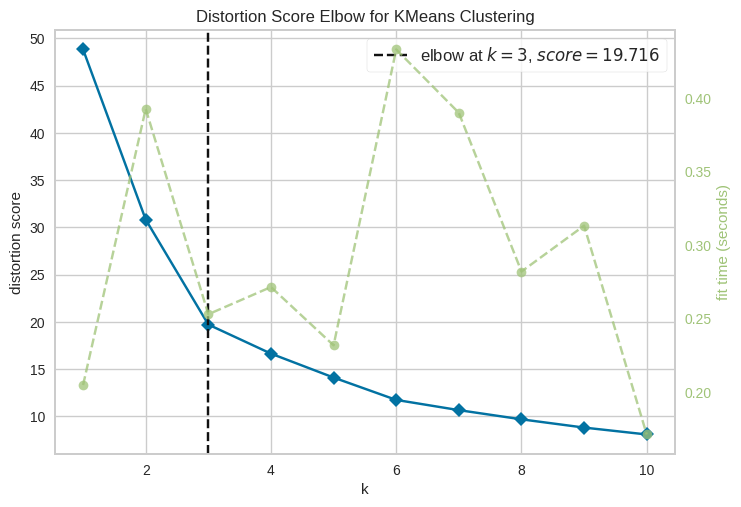

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
kmeans = KMeans(random_state=42, n_init=50)
visualizer = KElbowVisualizer(kmeans, k=(1,11))
visualizer.fit(rfm_df)
visualizer.show()

In [ ]:
# Menggunakan algoritma K-Means Clustering
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=50)
kmeans_model.fit(rfm_df)

KMeans(n_clusters=3, n_init=50, random_state=42)

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_score = silhouette_score(rfm_df, kmeans_model.labels_)
print(f"Silhouette Score: {silhouette_score}")

Silhouette Score: 0.38295158922130423


In [ ]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans_model, "model_clustering.pkl")

['model_clustering.pkl']

In [ ]:
rfm_df[numeric_cols] = scaler.inverse_transform(rfm_df[numeric_cols])

In [ ]:
rfm_df

,Recency,Frequency,Monetary
0,184.0,5.0,5563.560
1,19.0,9.0,1056.390
2,259.0,4.0,1790.512
3,55.0,6.0,5086.935
4,415.0,3.0,886.156
...,...,...,...
788,43.0,11.0,2374.658
789,4.0,5.0,5454.350
790,9.0,8.0,6720.444
791,54.0,13.0,8025.707


# **5. Interpretasi Cluster**

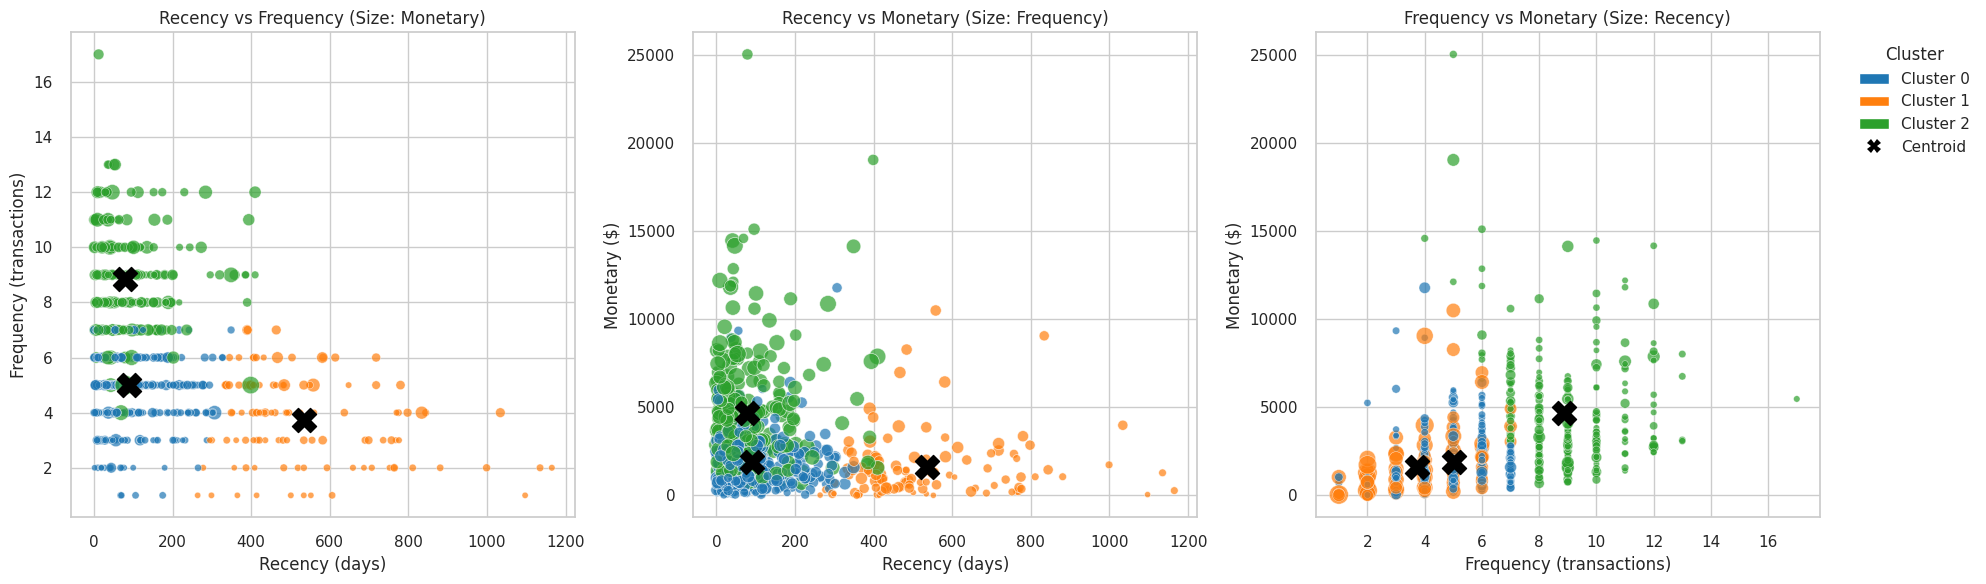

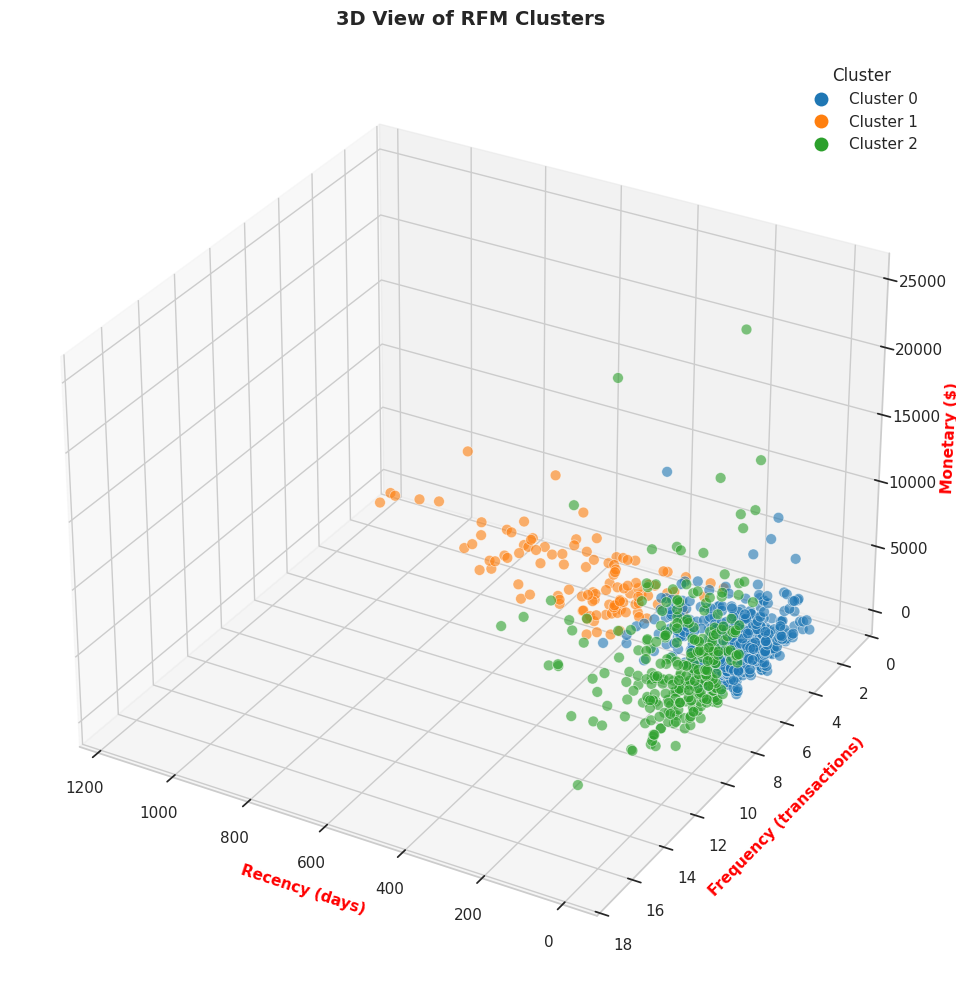

In [ ]:
rfm_df['Cluster'] = kmeans_model.labels_

cluster_labels = sorted(rfm_df['Cluster'].unique())
n_clusters = len(cluster_labels)
palette = sns.color_palette("tab10", n_colors=n_clusters)
cluster_color_map = dict(zip(cluster_labels, palette))
cluster_centers = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20,6))

# Siapkan Legend Awal
legend_elements = [Patch(facecolor=cluster_color_map[i], label=f'Cluster {i}')
                   for i in cluster_labels]
legend_elements.append(Line2D([0], [0], marker='X', color='w', label='Centroid',
                          markerfacecolor='black', markersize=10))

# Recency vs Frequency
sns.scatterplot(
    data=rfm_df, x='Recency', y='Frequency', hue='Cluster',
    palette=cluster_color_map, hue_order=cluster_labels,
    size='Monetary', sizes=(20,200), alpha=0.7, ax=axes[0], legend=False
)
# Plot Center
axes[0].scatter(cluster_centers['Recency'], cluster_centers['Frequency'],
                s=300, c='black', marker='X', zorder=10)
axes[0].set_title('Recency vs Frequency (Size: Monetary)')
axes[0].set_xlabel('Recency (days)')
axes[0].set_ylabel('Frequency (transactions)')

# Recency vs Monetary
sns.scatterplot(
    data=rfm_df, x='Recency', y='Monetary', hue='Cluster',
    palette=cluster_color_map, hue_order=cluster_labels,
    size='Frequency', sizes=(20,200), alpha=0.7, ax=axes[1], legend=False
)
# Plot Center
axes[1].scatter(cluster_centers['Recency'], cluster_centers['Monetary'],
                s=300, c='black', marker='X', zorder=10)
axes[1].set_title('Recency vs Monetary (Size: Frequency)')
axes[1].set_xlabel('Recency (days)')
axes[1].set_ylabel('Monetary ($)')

# Frequency vs Monetary
sns.scatterplot(
    data=rfm_df, x='Frequency', y='Monetary', hue='Cluster',
    palette=cluster_color_map, hue_order=cluster_labels,
    size='Recency', sizes=(20,200), alpha=0.7, ax=axes[2], legend=False
)
# Plot Center
axes[2].scatter(cluster_centers['Frequency'], cluster_centers['Monetary'],
                s=300, c='black', marker='X', zorder=10)
axes[2].set_title('Frequency vs Monetary (Size: Recency)')
axes[2].set_xlabel('Frequency (transactions)')
axes[2].set_ylabel('Monetary ($)')

# Legend
axes[2].legend(handles=legend_elements, title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3D Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
colors = rfm_df['Cluster'].map(cluster_color_map)
sc = ax.scatter(
    xs=rfm_df['Recency'],
    ys=rfm_df['Frequency'],
    zs=rfm_df['Monetary'],
    c=colors,
    s=60,
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

# Setting Label Sumbu
ax.set_xlabel('Recency (days)', fontsize=11, labelpad=10, fontweight='bold', color='red')
ax.set_ylabel('Frequency (transactions)', fontsize=11, labelpad=10, fontweight='bold', color='red')
ax.set_zlabel('Monetary ($)', fontsize=11, labelpad=10, fontweight='bold', color='red')
ax.set_title('3D View of RFM Clusters', fontsize=14, fontweight='bold', pad=20)

# Legend Manual untuk 3D Plot
legend_elements_3d = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {c}',
                          markerfacecolor=cluster_color_map[c], markersize=10)
                   for c in cluster_labels]

ax.legend(handles=legend_elements_3d, title="Cluster", loc='upper right')
ax.view_init(elev=30, azim=120)
plt.tight_layout()
plt.show()

In [ ]:
rfm_df.describe()

,Recency,Frequency,Monetary,Cluster
count,793.000000,793.000000,793.000000,793.000000
mean,148.286255,6.206810,2851.874884,0.853720
std,187.081466,2.525647,2620.668723,0.916344
min,0.000000,1.000000,4.833000,0.000000
25%,30.000000,4.000000,1081.466000,0.000000
50%,75.000000,6.000000,2215.002000,0.000000
75%,184.000000,8.000000,3670.258000,2.000000
max,1165.000000,17.000000,25043.050000,2.000000


In [ ]:
# Simpan Data
final_df['Cluster'] = kmeans_model.labels_
final_df.to_csv('data_clustering.csv', index=False)

In [ ]:
final_df

,Customer ID,Customer Name,Recency,Frequency,Monetary,Avg_Item_Price,Unique_Product_Count,Fav_Product,City,State,...,Office Supplies_Count,Technology_Count,First Class_Count,Same Day_Count,Second Class_Count,Standard Class_Count,Consumer_Count,Corporate_Count,Home Office_Count,Cluster
0,AA-10315,Alex Avila,184,5,5563.560,505.778182,11,"Acco Banker's Clasps, 5 3/4""-Long",Round Rock,Texas,...,8,2,1,0,0,10,11,0,0,0
1,AA-10375,Allen Armold,19,9,1056.390,70.426000,15,"ACCOHIDE 3-Ring Binder, Blue, 1""",Atlanta,Georgia,...,11,3,4,0,3,8,15,0,0,2
2,AA-10480,Andrew Allen,259,4,1790.512,149.209333,12,"Carina 42""Hx23 3/4""W Media Storage Unit",Detroit,Michigan,...,8,2,0,1,0,11,12,0,0,0
3,AA-10645,Anna Andreadi,55,6,5086.935,282.607500,18,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",Georgetown,California,...,8,2,7,0,0,11,18,0,0,0
4,AB-10015,Aaron Bergman,415,3,886.156,147.692667,6,Akro Stacking Bins,Seattle,Washington,...,3,1,5,0,0,1,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,Xylona Preis,43,11,2374.658,84.809214,28,"Acco Pressboard Covers with Storage Hooks, 9 1...",Los Angeles,California,...,21,3,2,0,3,23,28,0,0,2
789,YC-21895,Yoseph Carroll,4,5,5454.350,681.793750,8,AT&T CL83451 4-Handset Telephone,Newark,Delaware,...,5,2,2,1,0,5,0,8,0,0
790,YS-21880,Yana Sorensen,9,8,6720.444,560.037000,11,Letter Size Cart,Seattle,California,...,8,1,1,0,0,11,0,12,0,2
791,ZC-21910,Zuschuss Carroll,54,13,8025.707,258.893774,31,"#10 White Business Envelopes,4 1/8 x 9 1/2",Houston,Texas,...,17,6,4,0,1,26,31,0,0,2


In [ ]:
  # Analisis Deskriptif
  numerical_cols = final_df.select_dtypes(include=np.number).columns.tolist()
  categorical_cols = final_df.select_dtypes(include='object').columns.tolist()
  if 'Cluster' in numerical_cols:
      numerical_cols.remove('Cluster')

  numeric_desc = final_df.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max']).T
  categoric_desc = final_df.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode().tolist()).T

  # Combine
  print("Numerical Feature Description:")
  display(numeric_desc)
  print("\nCategorical Feature Description (Mode):")
  display(categoric_desc)

Numerical Feature Description:


Cluster                                0             1             2
Recency               mean     89.987469    534.828829     78.869258
                      min       0.000000    264.000000      0.000000
                      max     349.000000   1165.000000    410.000000
Frequency             mean      5.020050      3.729730      8.851590
                      min       1.000000      1.000000      4.000000
                      max       7.000000      7.000000     17.000000
Monetary              mean   1913.188709   1616.211087   4659.982534
                      min      22.328000      4.833000    684.171000
                      max   11789.630000  10501.653000  25043.050000
Avg_Item_Price        mean    203.040537    200.543531    272.296653
                      min       7.442667      2.416500     40.245353
                      max    1751.292000   1166.850333   1669.536667
Unique_Product_Count  mean      9.676692      7.414414     17.904594
                      min       1.000000      1.000000      9.000000
                      max      21.000000     21.000000     34.000000
Furniture_Count       mean      2.052632      1.603604      3.819788
                      min       0.000000      0.000000      0.000000
                      max       8.000000      5.000000     15.000000
Office Supplies_Count mean      5.907268      4.594595     10.749117
                      min       0.000000      0.000000      3.000000
                      max      15.000000     14.000000     23.000000
Technology_Count      mean      1.736842      1.243243      3.469965
                      min       0.000000      0.000000      0.000000
                      max       7.000000      5.000000      9.000000
First Class_Count     mean      1.533835      1.063063      2.724382
                      min       0.000000      0.000000      0.000000
                      max      10.000000      8.000000     14.000000
Same Day_Count        mean      0.571429      0.333333      0.964664
                      min       0.000000      0.000000      0.000000
                      max      11.000000      4.000000     12.000000
Second Class_Count    mean      1.852130      1.513514      3.515901
                      min       0.000000      0.000000      0.000000
                      max      12.000000      8.000000     19.000000
Standard Class_Count  mean      5.739348      4.531532     10.833922
                      min       0.000000      0.000000      1.000000
                      max      17.000000     17.000000     26.000000
Consumer_Count        mean      5.481203      3.900901      8.766784
                      min       0.000000      0.000000      0.000000
                      max      21.000000     21.000000     35.000000
Corporate_Count       mean      2.609023      1.927928      6.000000
                      min       0.000000      0.000000      0.000000
                      max      19.000000     17.000000     32.000000
Home Office_Count     mean      1.606516      1.612613      3.272085
                      min       0.000000      0.000000      0.000000
                      max      21.000000     15.000000     34.000000


Categorical Feature Description (Mode):


Cluster,0,1,2
Customer ID,"[AA-10315, AA-10480, AA-10645, AB-10150, AB-10...","[AB-10015, AF-10885, AG-10525, AO-10810, AR-10...","[AA-10375, AB-10060, AB-10105, AB-10165, AB-10..."
Customer Name,"[Aaron Hawkins, Aaron Smayling, Adrian Hane, A...","[Aaron Bergman, Andy Gerbode, Anemone Ratner, ...","[Adam Bellavance, Adam Hart, Adam Shillingsbur..."
Fav_Product,[Adams Telephone Message Book w/Frequently-Cal...,[Aluminum Screw Posts],"[ACCOHIDE 3-Ring Binder, Blue, 1""]"
City,[New York City],[New York City],[New York City]
State,[California],[California],[California]
Region,[East],[East],[West]


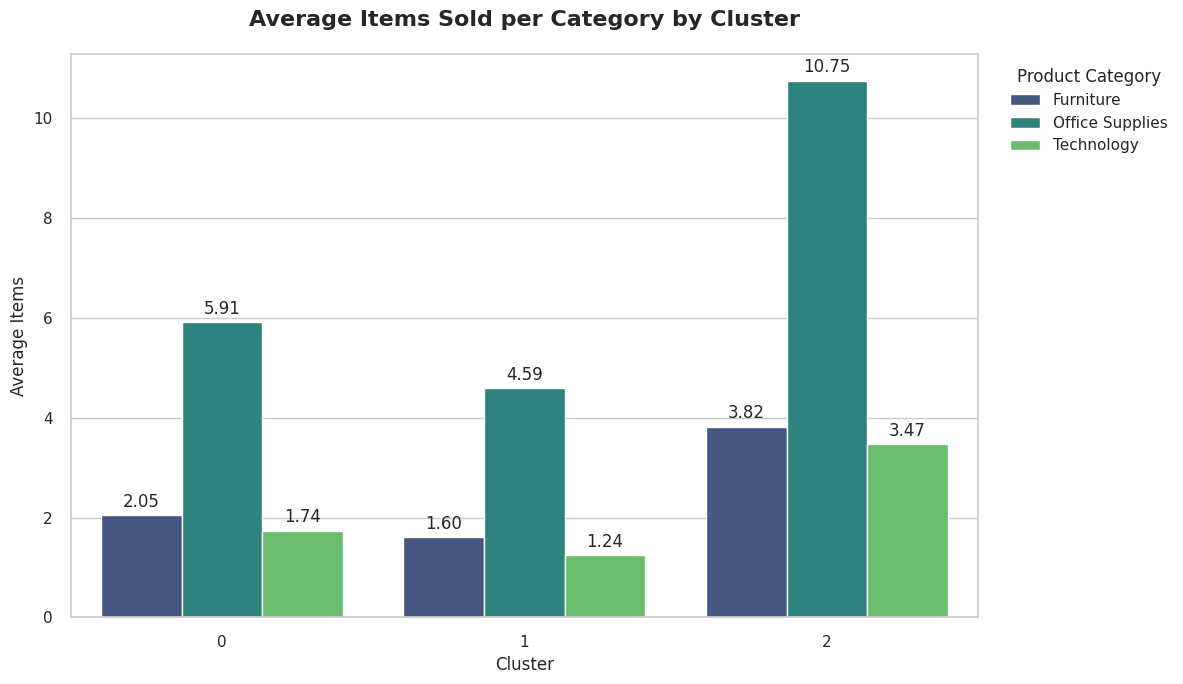

In [ ]:
# 1. Tentukan kolom kategori
target_cols = ['Furniture_Count', 'Office Supplies_Count', 'Technology_Count']

# 2. Group by Cluster dan Mean (Menggunakan final_df)
cluster_category_mean = final_df.groupby('Cluster')[target_cols].mean().reset_index()

# 3. "Melt" data (Reshape)
df_melted_mean = cluster_category_mean.melt(
    id_vars='Cluster',
    value_vars=target_cols,
    var_name='Category',
    value_name='Average_Items'
)

# Bersihkan nama kategori
df_melted_mean['Category'] = df_melted_mean['Category'].str.replace('_Count', '')

# 4. Visualisasi
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

# Barplot
ax = sns.barplot(
    data=df_melted_mean,
    x='Cluster',
    y='Average_Items',
    hue='Category',
    palette='viridis'
)

# Styling
plt.title('Average Items Sold per Category by Cluster', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Items', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.02, 1), loc='upper left')

# Menambahkan label angka
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

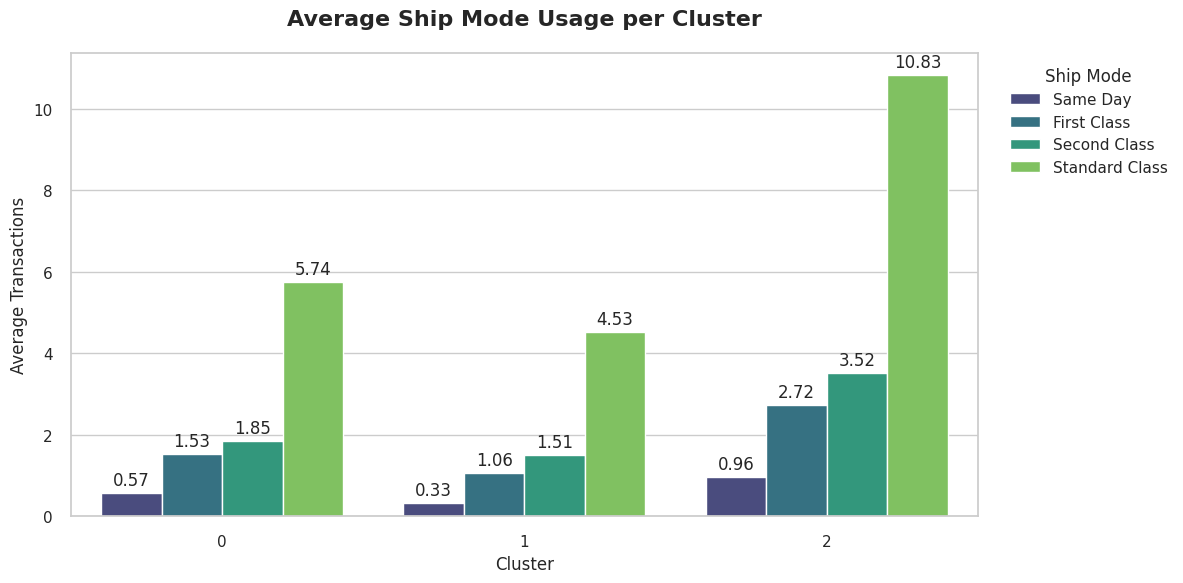

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tentukan kolom Ship Mode
# (Pastikan nama kolom sesuai dengan hasil crosstab kamu)
ship_cols = ['Same Day_Count', 'First Class_Count', 'Second Class_Count', 'Standard Class_Count']

# 2. Group by Cluster dan Hitung Rata-rata
ship_mean = final_df.groupby('Cluster')[ship_cols].mean().reset_index()

# 3. Melt Data
df_melted_ship = ship_mean.melt(
    id_vars='Cluster',
    value_vars=ship_cols,
    var_name='Ship Mode',
    value_name='Average_Count'
)

# Bersihkan nama (Hapus '_Count')
df_melted_ship['Ship Mode'] = df_melted_ship['Ship Mode'].str.replace('_Count', '')

# 4. Visualisasi
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

ax = sns.barplot(
    data=df_melted_ship,
    x='Cluster',
    y='Average_Count',
    hue='Ship Mode',
    palette='viridis' # Bisa ganti 'mako', 'rocket', atau 'tab10'
)

plt.title('Average Ship Mode Usage per Cluster', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Transactions', fontsize=12)
plt.legend(title='Ship Mode', bbox_to_anchor=(1.02, 1), loc='upper left')

# Label Angka
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

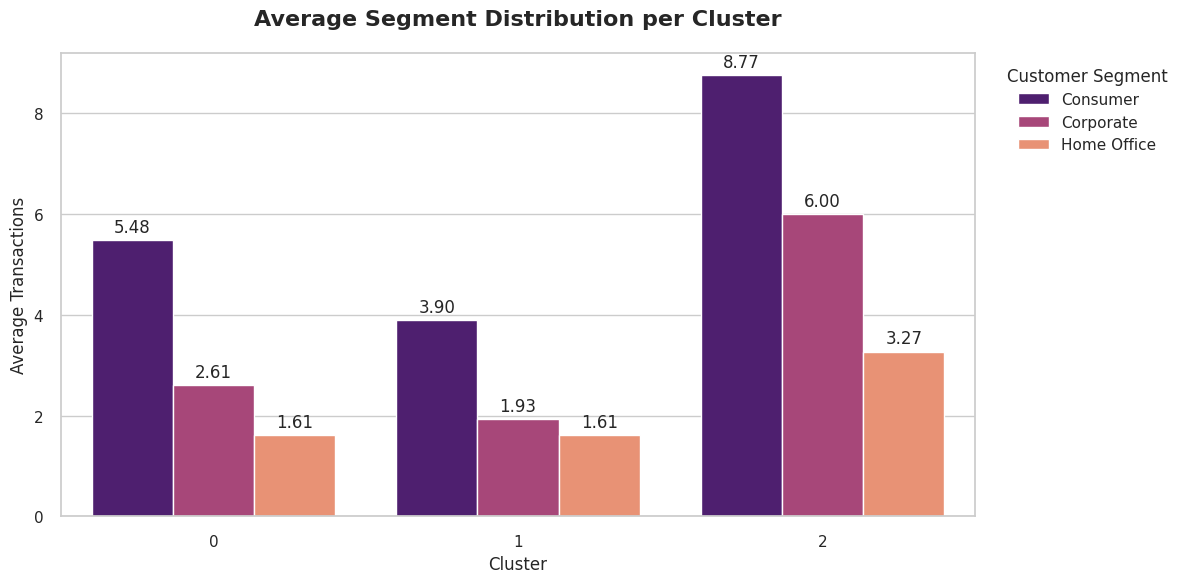

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tentukan kolom Segment
seg_cols = ['Consumer_Count', 'Corporate_Count', 'Home Office_Count']

# 2. Group by Cluster dan Hitung Rata-rata
seg_mean = final_df.groupby('Cluster')[seg_cols].mean().reset_index()

# 3. Melt Data
df_melted_seg = seg_mean.melt(
    id_vars='Cluster',
    value_vars=seg_cols,
    var_name='Segment',
    value_name='Average_Count'
)

# Bersihkan nama (Hapus '_Count')
df_melted_seg['Segment'] = df_melted_seg['Segment'].str.replace('_Count', '')

# 4. Visualisasi
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

ax = sns.barplot(
    data=df_melted_seg,
    x='Cluster',
    y='Average_Count',
    hue='Segment',
    palette='magma' # Saya bedakan paletnya agar variatif
)

plt.title('Average Segment Distribution per Cluster', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Transactions', fontsize=12)
plt.legend(title='Customer Segment', bbox_to_anchor=(1.02, 1), loc='upper left')

# Label Angka
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

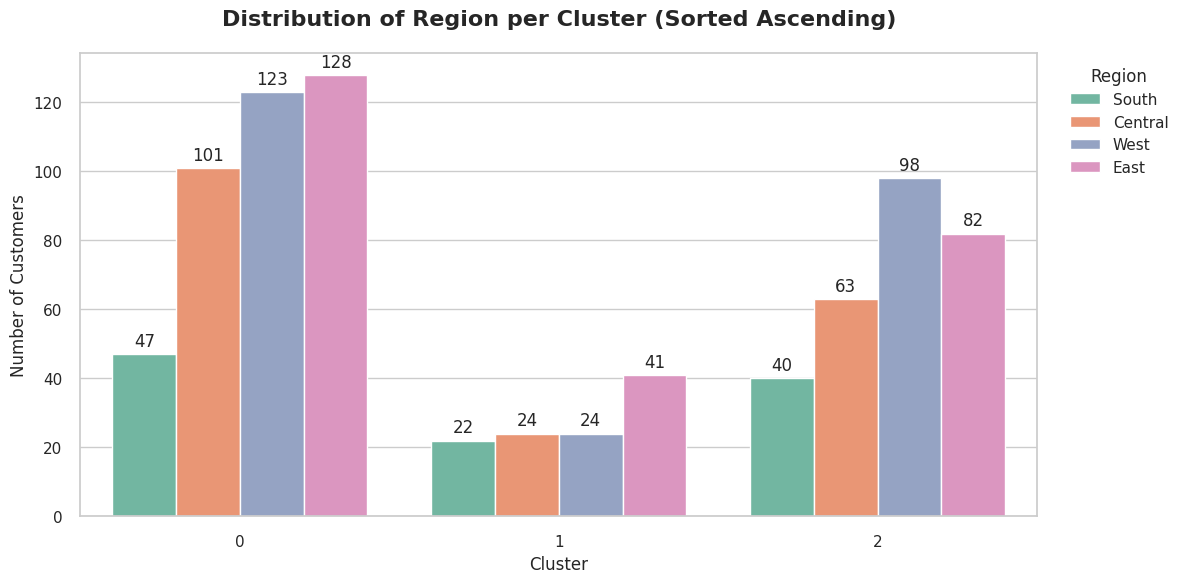

In [ ]:
# 1. Hitung jumlah customer per Cluster dan Region
region_cluster_count = final_df.groupby(['Cluster', 'Region']).size().reset_index(name='Customer_Count')

# 2. Menentukan Urutan (Sorting)
# Kita hitung total per region dulu untuk menentukan urutan hue dari terkecil ke terbesar secara global
hue_order_sorted = region_cluster_count.groupby('Region')['Customer_Count'].sum().sort_values(ascending=True).index.tolist()

# 3. Visualisasi
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

ax = sns.barplot(
    data=region_cluster_count,
    x='Cluster',
    y='Customer_Count',
    hue='Region',
    hue_order=hue_order_sorted, # <--- KUNCI: Memasukkan urutan yang sudah disortir
    palette='Set2'
)

plt.title('Distribution of Region per Cluster (Sorted Ascending)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.02, 1), loc='upper left')

# Label Angka
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()

In [ ]:
subcat_counts = final_df.groupby(['Cluster', 'Fav_Product']).size().reset_index(name='Count')
subcat_counts = subcat_counts.sort_values(['Cluster', 'Count'], ascending=[True, False])
subcat_counts['Rank'] = subcat_counts.groupby('Cluster').cumcount() + 1

top_6_filtered = subcat_counts[subcat_counts['Rank'] <= 6]
top_products = top_6_filtered.pivot(index='Rank', columns='Cluster', values='Fav_Product')
top_products.columns = [f'Cluster {col}' for col in top_products.columns]

print("Top 6 Favorite Products per Cluster:")
display(top_products)

Top 6 Favorite Products per Cluster:


,Cluster 0,Cluster 1,Cluster 2
Rank,,,
1,Adams Telephone Message Book w/Frequently-Call...,Aluminum Screw Posts,"ACCOHIDE 3-Ring Binder, Blue, 1"""
2,Acco 3-Hole Punch,12-1/2 Diameter Round Wall Clock,3M Hangers With Command Adhesive
3,Acco D-Ring Binder w/DublLock,4009 Highlighters by Sanford,"#10 White Business Envelopes,4 1/8 x 9 1/2"
4,Acco Flexible ACCOHIDE Square Ring Data Binder...,9-3/4 Diameter Round Wall Clock,APC 7 Outlet Network SurgeArrest Surge Protector
5,"Acco Pressboard Covers with Storage Hooks, 14 ...",AT&T 17929 Lendline Telephone,#10 Self-Seal White Envelopes
6,Acco Translucent Poly Ring Binders,Acco Hanging Data Binders,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes"


In [ ]:
top_products.to_csv('top_products.csv', index=False)

End of Code.